<a href="https://colab.research.google.com/github/ABHIRAM199/my_practice/blob/main/Image_Similarity_Understanding_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Image Similarity: Understanding Embeddings

# Agenda
* Introduction to Image Similarity
* Feature Extraction
* Dimensionality Reduction
* Evaluation Metrics

#Introduction to Image Similarity
- Image similarity refers to the degree of resemblance or likeness between two or more images. It plays a crucial role in various computer vision tasks such as image retrieval, image classification, object detection, and content-based image retrieval systems. Understanding image similarity allows us to quantify how visually similar images are, enabling applications like recommendation systems, search engines, and image clustering.

**Embeddings in Image Similarity:**
- Embeddings are low-dimensional vector representations of high-dimensional data, such as images, text, or audio. In the context of image similarity, embeddings are feature vectors extracted from images that capture their semantic and visual characteristics in a compact and meaningful way. These embeddings are learned representations of images that encode important visual information, making them suitable for tasks like image retrieval and similarity comparison.



#Feature Extraction



- Color histograms represent the distribution of colors in an image. They divide the color space into bins and count the number of pixels that fall into each bin. Histograms are often used as a simple and effective feature for image similarity tasks. By comparing the histograms of two images, one can measure their similarity based on color distribution.



**Texture Descriptors:**
- Texture descriptors capture the spatial arrangement of pixel intensities in an image. They provide information about the patterns and textures present in the image, such as smoothness, roughness, or regularity. Common texture descriptors include local binary patterns (LBP), gray-level co-occurrence matrices (GLCM), and Gabor filters. These descriptors are useful for detecting repetitive patterns and structures in images, which can be important for similarity analysis.

**Deep Learning Embeddings:**
- Deep learning embeddings are low-dimensional vector representations of images learned automatically from data using deep neural networks. Convolutional Neural Networks (CNNs) are commonly used to learn embeddings by training on large image datasets. These embeddings capture high-level semantic information about images, making them well-suited for image similarity tasks. Techniques like Siamese networks and triplet loss are often employed to train CNNs for learning image embeddings in a supervised manner.

**Similarity Measures:**
- Similarity measures quantify the similarity between pairs of images based on their feature representations. Common similarity measures include cosine similarity, Euclidean distance, and Manhattan distance. These measures compare the feature vectors of images in the embedding space and provide a numerical score indicating their similarity. By thresholding this score, one can determine whether two images are considered similar or dissimilar.

**Dimensionality Reduction:**
- Dimensionality reduction techniques like Principal Component Analysis (PCA) or t-distributed Stochastic Neighbor Embedding (t-SNE) are often applied to reduce the dimensionality of image feature representations while preserving their discriminative information. This helps in visualizing high-dimensional embeddings and understanding the underlying structure of image data. Dimensionality reduction can also improve the efficiency of similarity computation by reducing the computational complexity of comparing images in high-dimensional spaces.








1/1 [==============================] - 2s 2s/step
Cosine Similarity: 0.8481318354606628
Euclidean Distance: 329.9903869628906
Manhattan Distance: 14681.274


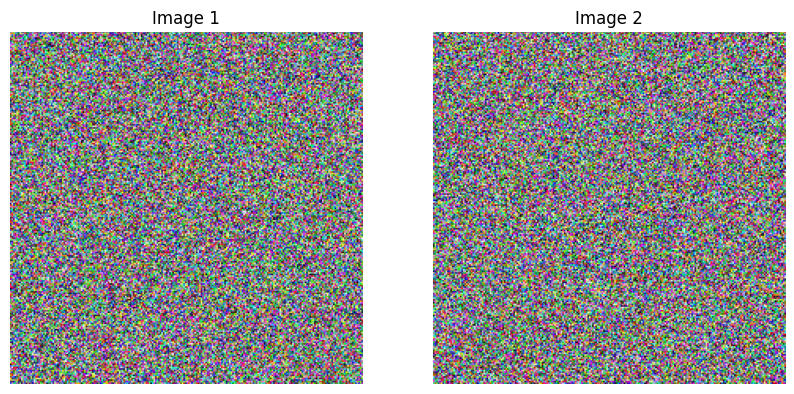

In [ ]:
import numpy as np
from scipy.spatial.distance import cosine, euclidean, cityblock
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Function to generate random images
def generate_random_image(size=(224, 224, 3)):
    return np.random.rand(*size) * 255

# Function to extract features from an image
def extract_features(img_array, model):
    x = preprocess_input(np.expand_dims(img_array, axis=0))
    features = model.predict(x)
    return features.flatten()

# Compute similarity measures
def similarity_measure(img1_array, img2_array, model):
    features_img1 = extract_features(img1_array, model)
    features_img2 = extract_features(img2_array, model)

    cosine_sim = 1 - cosine(features_img1, features_img2)
    euclidean_dist = euclidean(features_img1, features_img2)
    manhattan_dist = cityblock(features_img1, features_img2)

    return cosine_sim, euclidean_dist, manhattan_dist

# Main function
def main():
    # Generate random images
    img1_array = generate_random_image()
    img2_array = generate_random_image()

    # Load pre-trained VGG16 model
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    feature_extractor_model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_pool').output)

    # Compute similarity measures
    cosine_sim, euclidean_dist, manhattan_dist = similarity_measure(img1_array, img2_array, feature_extractor_model)

    print("Cosine Similarity:", cosine_sim)
    print("Euclidean Distance:", euclidean_dist)
    print("Manhattan Distance:", manhattan_dist)

    # Plot images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img1_array.astype('uint8'))
    plt.title('Image 1')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img2_array.astype('uint8'))
    plt.title('Image 2')
    plt.axis('off')

    plt.show()

# Run the main function
main()


#Hierarchical Clustering:

- Hierarchical clustering is a method used to group similar data points into clusters based on their pairwise distances. In the context of image similarity and understanding embeddings, hierarchical clustering can be applied to organize images into a hierarchical structure, where similar images are grouped together at different levels of granularity. This hierarchical representation can provide insights into the natural organization of images based on their visual features, allowing for exploratory analysis and visualization of image similarities.

**Locality-Sensitive Hashing (LSH):**
- Locality-sensitive hashing (LSH) is a technique used to approximate similarity search in high-dimensional spaces by hashing data points into buckets such that similar points are mapped to the same bucket with high probability. In the context of image similarity and understanding embeddings, LSH can be used to efficiently search for similar images in large collections by reducing the search space to a subset of potentially similar candidates. This can significantly speed up the process of finding nearest neighbors or similar images, especially when dealing with high-dimensional embeddings.

**Visualization Techniques:**
- Visualization techniques such as scatter plots, heatmaps, and interactive visualizations are commonly used to explore and interpret image embeddings in lower-dimensional spaces. These techniques allow researchers and practitioners to visually analyze the distribution of images, identify clusters or patterns, and gain insights into the underlying structure of image data. Visualization aids in understanding the relationships between images, identifying outliers, and assessing the effectiveness of dimensionality reduction techniques in preserving important characteristics of the data.

**Evaluation Metrics:**
- Evaluation metrics are used to quantitatively assess the performance of image similarity and embedding methods. Common evaluation metrics include precision, recall, F1-score, and mean average precision (mAP). These metrics provide insights into the accuracy, completeness, and overall effectiveness of image similarity algorithms in retrieving relevant images or organizing images into meaningful clusters. Evaluation metrics are essential for comparing different methods, optimizing parameters, and validating the performance of image similarity systems in real-world applications.

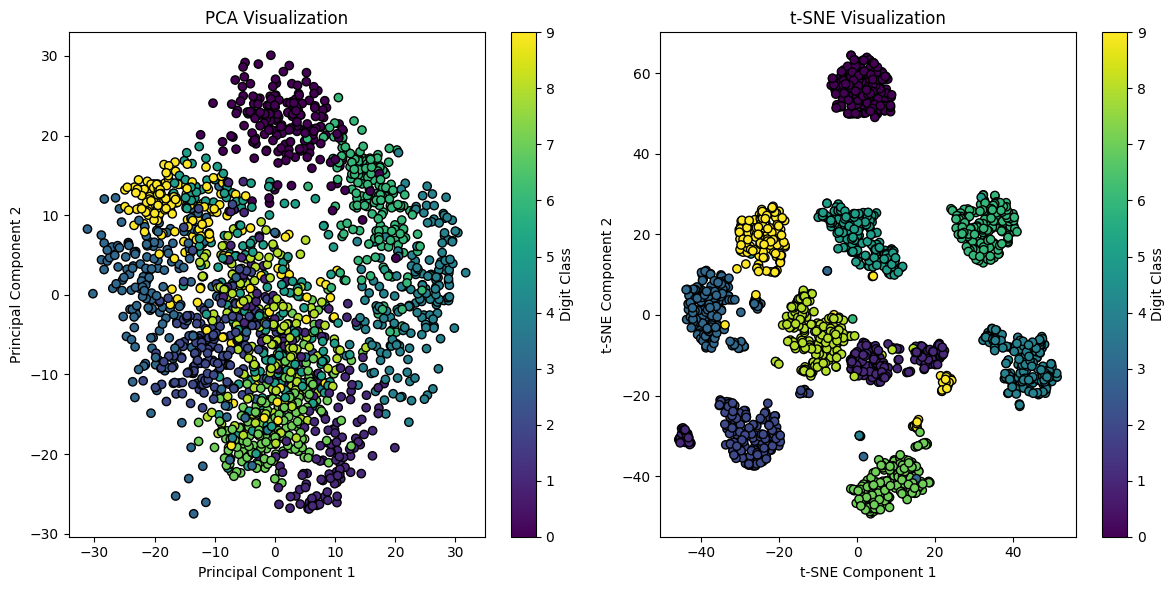

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

# Load example dataset (e.g., MNIST digits)
digits = load_digits()
X = digits.data
y = digits.target

# Apply dimensionality reduction techniques (PCA and t-SNE)
pca = PCA(n_components=2)
tsne = TSNE(n_components=2)

X_pca = pca.fit_transform(X)
X_tsne = tsne.fit_transform(X)

# Plot embeddings using scatter plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Digit Class')

plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Digit Class')

plt.tight_layout()
plt.show()


#Similarity Measures

- Similarity measures are crucial in various applications, including image retrieval, recommendation systems, and clustering. They help quantify how similar or dissimilar two images are based on their feature representations.

**Here's a brief explanation of each common similarity measure:**

- **Cosine Similarity:** Cosine similarity measures the cosine of the angle between two vectors in an n-dimensional space. It calculates the similarity of direction, not magnitude. Cosine similarity ranges from -1 to 1, where 1 indicates perfect similarity, 0 indicates no similarity, and -1 indicates complete dissimilarity.

- **Euclidean Distance:** Euclidean distance is the straight-line distance between two points in Euclidean space. In the context of feature vectors, it measures the magnitude of the difference between the vectors. Smaller Euclidean distance implies greater similarity, and larger distance implies less similarity.

- **Manhattan Distance:** Manhattan distance, also known as city block distance or L1 distance, calculates the sum of absolute differences between the coordinates of two points. It measures the distance one would have to travel along a grid-like path to reach from one point to another. Similar to Euclidean distance, smaller Manhattan distance suggests greater similarity.



1/1 [==============================] - 1s 525ms/step
Similarity between Image 1 and Image 2:
  Cosine Similarity: 0.8565
  Euclidean Distance: 319.8262
  Manhattan Distance: 14168.8750
Similarity between Image 1 and Image 3:
  Cosine Similarity: 0.8564
  Euclidean Distance: 316.4710
  Manhattan Distance: 14262.2803
Similarity between Image 1 and Image 4:
  Cosine Similarity: 0.8677
  Euclidean Distance: 307.2772
  Manhattan Distance: 13999.8408
Similarity between Image 1 and Image 5:
  Cosine Similarity: 0.8418
  Euclidean Distance: 342.5525
  Manhattan Distance: 15507.0244
Similarity between Image 2 and Image 3:
  Cosine Similarity: 0.8542
  Euclidean Distance: 315.5361
  Manhattan Distance: 14157.2256
Similarity between Image 2 and Image 4:
  Cosine Similarity: 0.8559
  Euclidean Distance: 317.8785
  Manhattan Distance: 13976.8896
Similarity between Image 2 and Image 5:
  Cosine Similarity: 0.8276
  Euclidean Distance: 355.1730
  Manhattan Distance: 15404.5078
Similarity between Imag

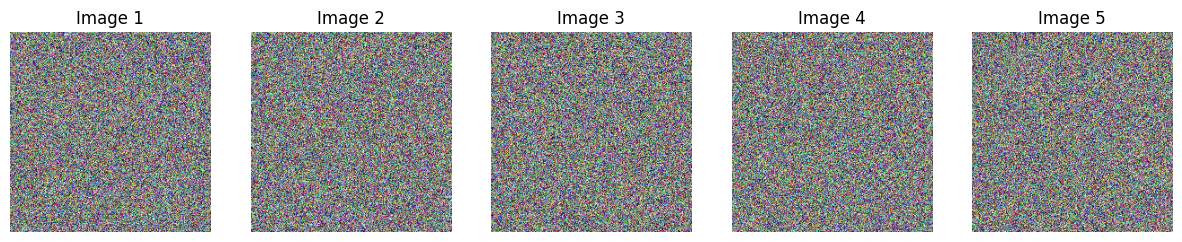

In [ ]:
import numpy as np
from scipy.spatial.distance import cosine, euclidean, cityblock
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Function to generate random images
def generate_random_image(size=(224, 224, 3)):
    return np.random.rand(*size) * 255

# Function to preprocess an image for VGG16 model
def preprocess_image(img_array):
    img_array = img_array.astype('float32')
    img_array = preprocess_input(img_array)
    return img_array

# Function to extract features from an image
def extract_features(img_array, model):
    features = model.predict(img_array)
    return features.flatten()

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
feature_extractor_model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_pool').output)

# Generate random images
num_images = 5
random_images = [generate_random_image() for _ in range(num_images)]
random_images = np.array(random_images)

# Preprocess images
preprocessed_images = np.array([preprocess_image(img) for img in random_images])

# Extract features for all images
features_list = [extract_features(np.expand_dims(img_array, axis=0), feature_extractor_model) for img_array in preprocessed_images]
features_array = np.array(features_list)

# Compute similarity measures for pairs of images
def compute_similarity_measures(features_array):
    num_images = features_array.shape[0]
    similarity_measures = []

    for i in range(num_images):
        for j in range(i + 1, num_images):
            cosine_sim = 1 - cosine(features_array[i], features_array[j])
            euclidean_dist = euclidean(features_array[i], features_array[j])
            manhattan_dist = cityblock(features_array[i], features_array[j])
            similarity_measures.append((i, j, cosine_sim, euclidean_dist, manhattan_dist))

    return similarity_measures

similarity_measures = compute_similarity_measures(features_array)

# Print similarity measures
for i, j, cosine_sim, euclidean_dist, manhattan_dist in similarity_measures:
    print(f"Similarity between Image {i+1} and Image {j+1}:")
    print(f"  Cosine Similarity: {cosine_sim:.4f}")
    print(f"  Euclidean Distance: {euclidean_dist:.4f}")
    print(f"  Manhattan Distance: {manhattan_dist:.4f}")

# Visualization
fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
for i in range(num_images):
    axes[i].imshow(random_images[i].astype('uint8'))
    axes[i].axis('off')
    axes[i].set_title(f'Image {i+1}')

plt.show()


#Dimensionality reduction

- Dimensionality reduction techniques like PCA and t-SNE are indeed powerful tools for visualizing high-dimensional data, such as image features extracted from deep learning models. Below, I will provide a simplified code example that extracts features from images, reduces their dimensionality using PCA and t-SNE, and visualizes the results.

**Step-by-Step Explanation:**
- Extract features using a pre-trained model (VGG16).
- Apply PCA to reduce the dimensionality of the extracted features to 50 dimensions.
- Apply t-SNE to further reduce the dimensionality to 2 dimensions for visualization.
- Visualize the reduced features using matplotlib.


1/1 [==============================] - 1s 1s/step


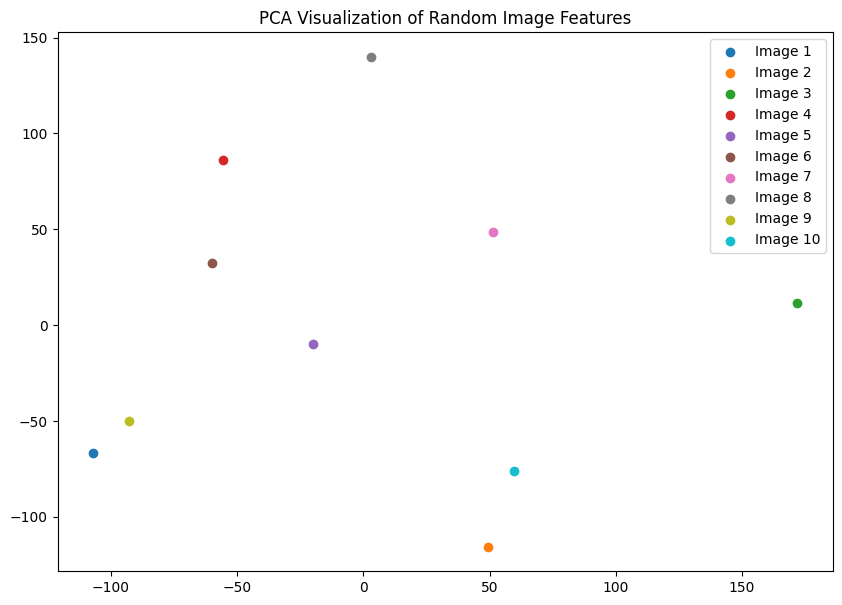

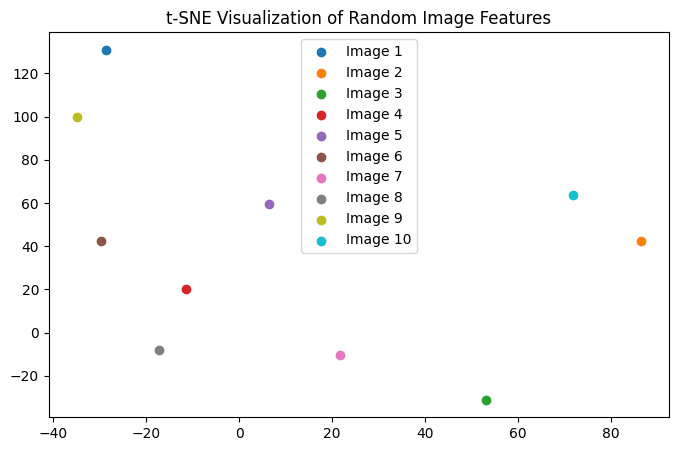

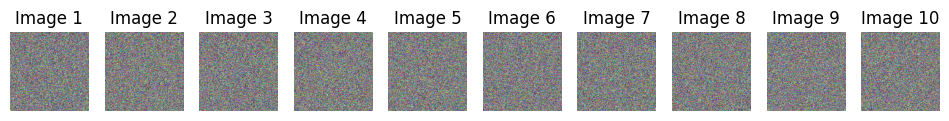

In [ ]:
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Function to generate random images
def generate_random_image(size=(224, 224, 3)):
    return np.random.rand(*size) * 255

# Function to preprocess an image for VGG16 model
def preprocess_image(img_array):
    img_array = img_array.astype('float32')
    img_array = preprocess_input(img_array)
    return img_array

# Function to extract features from an image
def extract_features(img_array, model):
    features = model.predict(img_array)
    return features.flatten()

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
feature_extractor_model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_pool').output)

# Generate random images
num_images = 10
random_images = [generate_random_image() for _ in range(num_images)]
random_images = np.array(random_images)

# Preprocess images
preprocessed_images = np.array([preprocess_image(img) for img in random_images])

# Extract features for all images
features_list = [extract_features(np.expand_dims(img_array, axis=0), feature_extractor_model) for img_array in preprocessed_images]
features_array = np.array(features_list)

# Apply PCA to reduce dimensionality to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_array)

# Apply t-SNE to further reduce dimensionality to 2 dimensions
tsne = TSNE(n_components=2, random_state=42, perplexity=3)
tsne_result = tsne.fit_transform(features_array)

# Plot PCA results
plt.figure(figsize=(10, 7))
for i in range(num_images):
    plt.scatter(pca_result[i, 0], pca_result[i, 1], label=f'Image {i+1}')
plt.title('PCA Visualization of Random Image Features')
plt.legend()
plt.show()

# Plot t-SNE results
plt.figure(figsize=(8, 5))
for i in range(num_images):
    plt.scatter(tsne_result[i, 0], tsne_result[i, 1], label=f'Image {i+1}')
plt.title('t-SNE Visualization of Random Image Features')
plt.legend()
plt.show()

# Plot random images
fig, axes = plt.subplots(1, num_images, figsize=(12, 4))
for i in range(num_images):
    axes[i].imshow(random_images[i].astype('uint8'))
    axes[i].axis('off')
    axes[i].set_title(f'Image {i+1}')
plt.show()


1/1 [==============================] - 1s 540ms/step


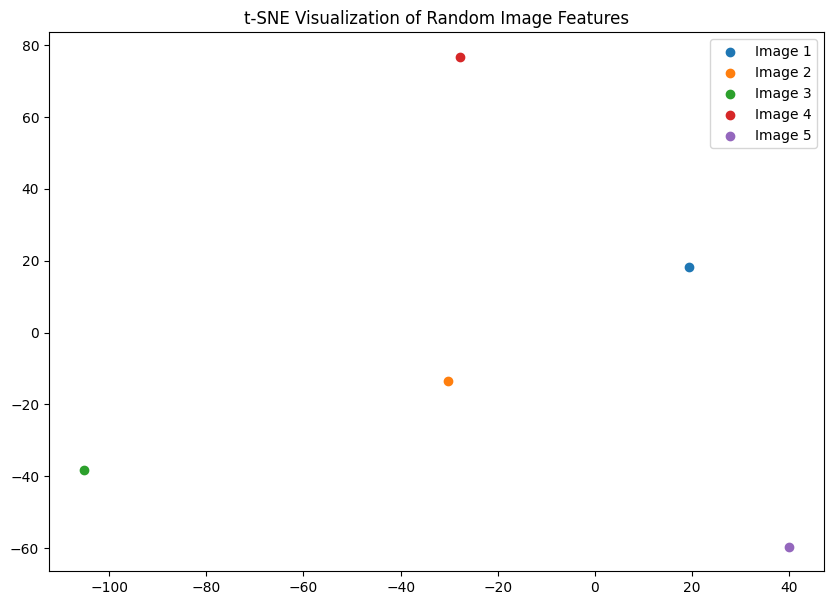

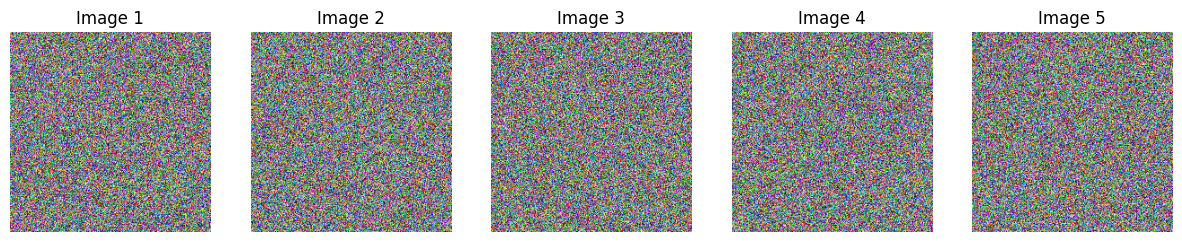

In [ ]:
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Function to generate random images
def generate_random_image(size=(224, 224, 3)):
    return np.random.rand(*size) * 255

# Function to preprocess an image for VGG16 model
def preprocess_image(img_array):
    img_array = img_array.astype('float32')
    img_array = preprocess_input(img_array)
    return img_array

# Function to extract features from an image
def extract_features(img_array, model):
    features = model.predict(img_array)
    return features.flatten()

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
feature_extractor_model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_pool').output)

# Generate random images
num_images = 5
random_images = [generate_random_image() for _ in range(num_images)]
random_images = np.array(random_images)

# Preprocess images
preprocessed_images = np.array([preprocess_image(img) for img in random_images])

# Extract features for all images
features_list = [extract_features(np.expand_dims(img_array, axis=0), feature_extractor_model) for img_array in preprocessed_images]
features_array = np.array(features_list)

# Apply PCA to reduce dimensionality to min(num_images, num_features) dimensions
pca = PCA(n_components=min(num_images, features_array.shape[1]))
pca_result = pca.fit_transform(features_array)

# Apply t-SNE to further reduce dimensionality to 2 dimensions
tsne = TSNE(n_components=2, perplexity=3, random_state=42)  # Setting perplexity less than num_images
tsne_result = tsne.fit_transform(pca_result)

# Plot t-SNE results
plt.figure(figsize=(10, 7))
for i in range(num_images):
    plt.scatter(tsne_result[i, 0], tsne_result[i, 1], label=f'Image {i+1}')

plt.title('t-SNE Visualization of Random Image Features')
plt.legend()
plt.show()

# Plot random images
fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
for i in range(num_images):
    axes[i].imshow(random_images[i].astype('uint8'))
    axes[i].axis('off')
    axes[i].set_title(f'Image {i+1}')

plt.show()


# Evaluation Metrics

- Evaluation metrics in the context of image similarity are used to quantitatively assess the performance of algorithms or models designed to measure similarity between images.

####**Precision:**
- **Precision:** Precision measures the accuracy of the retrieved similar images. It calculates the ratio of relevant images retrieved to the total number of retrieved images. In image similarity tasks, precision indicates how many of the retrieved images are truly similar to the query image.

- **Precision** = Number of relevant images retrieved / Total number of retrieved images




####**Recall:**
- **Recall:** Recall measures the completeness of the retrieval process. It calculates the ratio of relevant images retrieved to the total number of relevant images in the dataset. In image similarity tasks, recall indicates how many of the relevant images were successfully retrieved.

- **Recall** = Number of relevant images retrieved / Total number of relevant images in the dataset





####**F1-score**
- **F1-score:** The F1-score is the harmonic mean of precision and recall. It provides a single metric that balances both precision and recall. It is particularly useful when you want to consider both false positives and false negatives.


- **F1-score**= 2 × Precision × Recall / Precision + Recall
​

####**Mean Average Precision (mAP)**
- **Mean Average Precision (mAP):** mAP is commonly used in information retrieval tasks to evaluate the performance of retrieval systems. It calculates the average precision across all queries in the dataset. In image similarity tasks, mAP measures the overall effectiveness of the retrieval algorithm in retrieving relevant images.

